In [1]:
### VAR model for Multivariate Time Series Analysis
import os
os.chdir("F://buffalo//buffalo project//time_series//Mutlivariate_time_series")
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import statsmodels as sm
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [3]:
# Data import as DataFrame
EuStocks = pd.read_csv("EuIndices.csv")
EuStocks.head()

,Unnamed: 0,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


In [5]:
# Providing the index to the time series
data_frame = pd.DataFrame(data = EuStocks.values, columns = ['0', 'DAX', 'SMI', 'CAC', 'FTSE'],
                           index = pd.DatetimeIndex(start = '1991-01-01', periods = 1860, freq = 'B'))
data_frame_index = data_frame.drop(columns = ['0'])
data_frame_index.head(5)

,DAX,SMI,CAC,FTSE
1991-01-01,1628.75,1678.1,1772.8,2443.6
1991-01-02,1613.63,1688.5,1750.5,2460.2
1991-01-03,1606.51,1678.6,1718.0,2448.2
1991-01-04,1621.04,1684.1,1708.1,2470.4
1991-01-07,1618.16,1686.6,1723.1,2484.7


# checking for stationary data

In [6]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

In [8]:
# Loop to check all columns of the DF
import functools
data_frame_index.apply(functools.partial(test_stationarity))

Results of Dickey-Fuller Test:
Test Statistic                    2.295811
p-value                           0.998953
#Lags Used                       24.000000
Number of Observations Used    1835.000000
Critical Value (1%)              -3.433919
Critical Value (5%)              -2.863116
Critical Value (10%)             -2.567609
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    2.235032
p-value                           0.998910
#Lags Used                       22.000000
Number of Observations Used    1837.000000
Critical Value (1%)              -3.433915
Critical Value (5%)              -2.863115
Critical Value (10%)             -2.567608
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    1.286413
p-value                           0.996532
#Lags Used                       17.000000
Number of Observations Used    1842.000000
Critical Value (1%)              -3.433905
Critical Value (5%)              -2.863110
Critical Value (1

DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

# As we can see that the p value is higer than .05 we have to convert the data to statinory

In [9]:
# Differencing the data
data_diff = data_frame_index.diff().dropna()
data_diff.head()

,DAX,SMI,CAC,FTSE
1991-01-02,-15.12,10.4,-22.3,16.6
1991-01-03,-7.12,-9.9,-32.5,-12.0
1991-01-04,14.53,5.5,-9.9,22.2
1991-01-07,-2.88,2.5,15.0,14.3
1991-01-08,-7.55,-15.0,-8.8,-17.9


# checking again if the data is statioary or not

In [11]:
# Retest the differenced series
data_diff.apply(functools.partial(test_stationarity))

Results of Dickey-Fuller Test:
Test Statistic                -8.293747e+00
p-value                        4.193799e-13
#Lags Used                     1.900000e+01
Number of Observations Used    1.839000e+03
Critical Value (1%)           -3.433911e+00
Critical Value (5%)           -2.863113e+00
Critical Value (10%)          -2.567607e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.543303e+00
p-value                        9.652044e-14
#Lags Used                     1.900000e+01
Number of Observations Used    1.839000e+03
Critical Value (1%)           -3.433911e+00
Critical Value (5%)           -2.863113e+00
Critical Value (10%)          -2.567607e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.015705e+01
p-value                        7.680823e-18
#Lags Used                     1.600000e+01
Number of Observations Used    1.842000e+03
Critical Value (1%)           -3.433905e+00
Critical Value (5%)           -2.863110e+

DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

In [13]:
# Creating the VAR model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(data_diff)

In [14]:
# Best model order
modsel = model.select_order(15)
modsel.summary()

,AIC,BIC,FPE,HQIC
0,25.31,25.32*,9.833e+10,25.32
1,25.28,25.34,9.505e+10,25.30*
2,25.28,25.39,9.553e+10,25.32
3,25.27,25.43,9.458e+10,25.33
4,25.26,25.47,9.382e+10,25.34
5,25.26,25.51,9.357e+10,25.35
6,25.26,25.56,9.332e+10,25.37
7,25.26,25.61,9.361e+10,25.39
8,25.26,25.66,9.371e+10,25.41
9,25.26,25.70,9.314e+10,25.42


# as we can see from above that 11 row is the best as aic and fpe are lowest 

In [15]:
# Automated model order selection
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, Apr, 2019
Time:                     00:23:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.7862
Nobs:                     1848.00    HQIC:                   25.4466
Log likelihood:          -33638.3    FPE:                9.23092e+10
AIC:                      25.2484    Det(Omega_mle):     8.38399e+10
--------------------------------------------------------------------
Results for equation DAX
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.689997         0.772454            2.188           0.029
L1.DAX          -0.002794         0.042406           -0.066           0.947
L1.SMI          -0.106047         0.029764           -3.563           0.000
L1.CAC

# Granger test for causality and corelation


In [18]:

gt = results.test_causality('DAX', ['SMI', 'CAC', 'FTSE'], kind='f')
gt.summary()

Test statistic,Critical value,p-value,df
2.881,1.438,0.000,"(33, 7212)"


<Figure size 864x720 with 0 Axes>

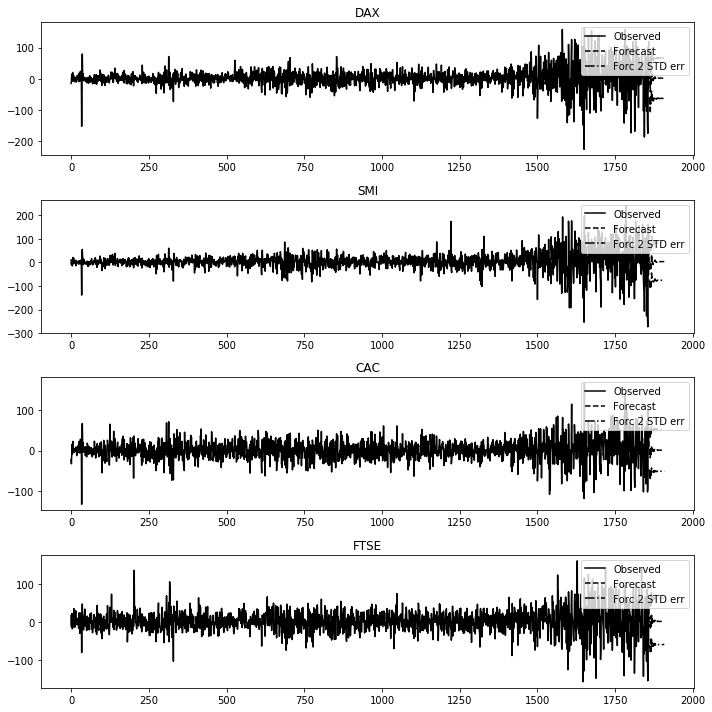

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
results.plot_forecast(50)
plt.tight_layout(h_pad = 1.15)
plt.show()

# as we can see that the plot is of difference data so it is not much of use 

In [21]:
fcast = results.forecast(data_diff.values, 50)

In [22]:
pd.DataFrame(fcast).head(10)

,0,1,2,3
0,2.741324,0.096875,4.277166,-1.866084
1,-10.667937,1.598237,-3.815663,-8.844529
2,-16.799369,-16.271632,-12.841545,-7.252005
3,-5.835582,-29.049581,-2.570316,-7.261091
4,-42.079109,-27.371264,-17.589227,-18.620932
5,5.382486,-2.529855,5.556139,14.653687
6,-18.456412,-26.073089,-9.344941,-2.803496
7,-5.182611,-6.843618,0.111457,-16.542253
8,24.483501,33.339289,9.212176,17.710238
9,6.596430,12.813030,5.150053,-3.233233


In [23]:
DAXvalues = pd.DataFrame(fcast)[0]
DAXvalues.head(10)

0     2.741324
1   -10.667937
2   -16.799369
3    -5.835582
4   -42.079109
5     5.382486
6   -18.456412
7    -5.182611
8    24.483501
9     6.596430
Name: 0, dtype: float64

In [40]:
data_frame.tail()

,0,DAX,SMI,CAC,FTSE
1998-02-10,1856.0,5460.43,7721.3,3939.5,5587.6
1998-02-11,1857.0,5285.78,7447.9,3846.0,5432.8
1998-02-12,1858.0,5386.94,7607.5,3945.7,5462.2
1998-02-13,1859.0,5355.03,7552.6,3951.7,5399.5
1998-02-16,1860.0,5473.72,7676.3,3995.0,5455.0


# using cumsum 

In [44]:
inverse_diff_data = np.cumsum(DAXvalues) + 5473.72

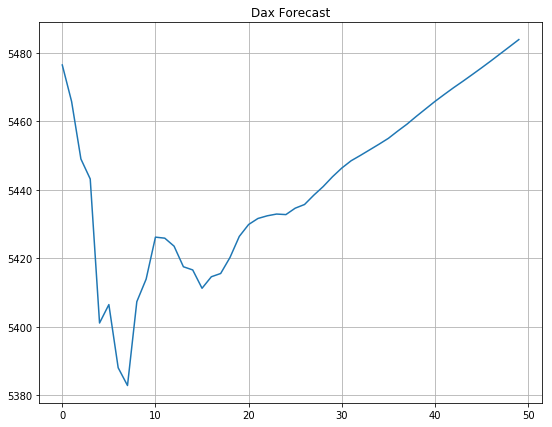

In [45]:
plt.figure(figsize = (9,7))
plt.plot(inverse_diff_data)
plt.title('Dax Forecast')
plt.grid()
plt.show()

In [48]:
inverse_diff_data.head()

0    5476.461324
1    5465.793387
2    5448.994018
3    5443.158436
4    5401.079327
Name: 0, dtype: float64